In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [119]:
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [120]:
# Dimension de los datos
print(df.shape)

(768, 9)


In [121]:
# Muestra información general
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [122]:
# Muestra estadística básica
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

Algoritmos de regresión

In [123]:
X = df.drop('Insulin', axis=1)
Y= df['Insulin']

In [124]:
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=.1, random_state=10) #esta es la semilla de aleatoriedad, se separa entrenamiento y test, se separa 90-10
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=.2, random_state=10) #esto separa entrenamiento y validacion, se separa 80-20

In [125]:
svr_model = SVR()
dt_model = DecisionTreeRegressor()
knn_model = KNeighborsRegressor()

In [126]:
svr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

val_predict_svr = svr_model.predict(X_val)
val_predict_dt = dt_model.predict(X_val)
val_predict_knn = knn_model.predict(X_val)

In [127]:
test_predict_svr = svr_model.predict(X_test)
test_predict_dt = dt_model.predict(X_test)
test_predict_knn = knn_model.predict(X_test)

Text(0.5, 1.0, 'SVR')

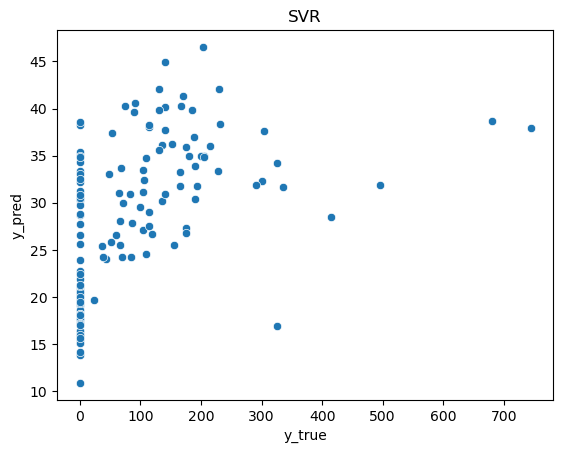

In [128]:
df_predictions = pd.DataFrame()
df_predictions["y_true"] = y_val
df_predictions["y_pred"] = val_predict_svr  

sns.scatterplot(data=df_predictions, x="y_true", y="y_pred")

plt.title("SVR")

Text(0.5, 1.0, 'Decision Tree')

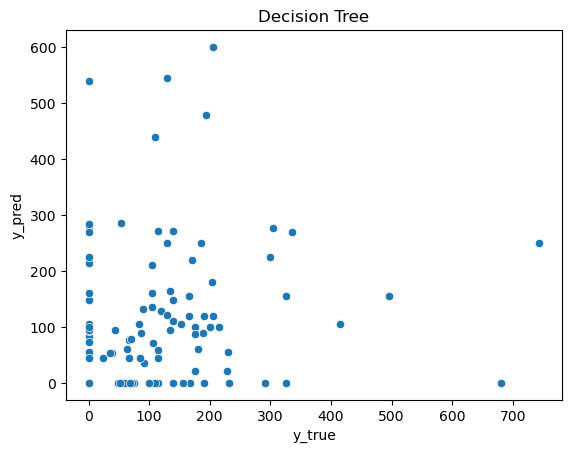

In [129]:
df_predictions["y_true"] = y_val
df_predictions["y_pred"] = val_predict_dt 

sns.scatterplot(data=df_predictions, x="y_true", y="y_pred")

plt.title("Decision Tree")

Text(0.5, 1.0, 'KNN')

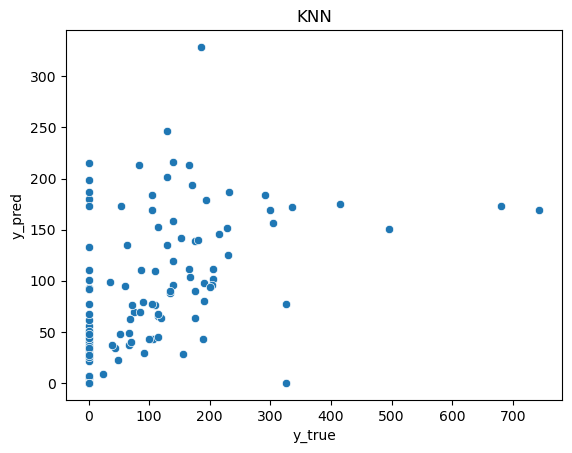

In [130]:
df_predictions["y_true"] = y_val
df_predictions["y_pred"] = val_predict_knn

sns.scatterplot(data=df_predictions, x="y_true", y="y_pred")

plt.title("KNN")

In [131]:
mae=mean_absolute_error(y_true=y_val, y_pred=val_predict_svr) #El MAE representa el promedio de las diferencias absolutas entre las predicciones del modelo y los valores reales.
mse=mean_squared_error(y_true=y_val, y_pred=val_predict_svr) #El MSE mide la media de los errores cuadrados entre las predicciones y los valores reales. Al elevar al cuadrado las diferencias, el MSE penaliza más severamente los errores grandes.
r2=r2_score(y_true=y_val, y_pred=val_predict_svr) #El R² Score mide la proporción de la variación en la variable dependiente que es explicada por el modelo. Un valor de R² de 1 indica que el modelo explica toda la variación, 0 indica que el modelo no explica ninguna variación y valores negativos indican que el modelo es peor que una simple media de los valores.

print(f"SVR MAE: {mae}, MSE: {mse}, R²: {r2}")

SVR MAE: 82.11700557403292, MSE: 18260.481076430457, R²: -0.17763259377539198


In [132]:
mae=mean_absolute_error(y_true=y_val, y_pred=val_predict_dt)
mse=mean_squared_error(y_true=y_val, y_pred=val_predict_dt)
r2=r2_score(y_true=y_val, y_pred=val_predict_dt)

print(f"DT MAE: {mae}, MSE: {mse}, R²: {r2}")

DT MAE: 83.9136690647482, MSE: 21317.59712230216, R²: -0.37478837973215606


In [133]:
mae=mean_absolute_error(y_true=y_val, y_pred=val_predict_knn)
mse=mean_squared_error(y_true=y_val, y_pred=val_predict_knn)
r2=r2_score(y_true=y_val, y_pred=val_predict_knn)

print(f"KNN MAE: {mae}, MSE: {mse}, R²: {r2}")

KNN MAE: 62.15827338129496, MSE: 11398.235395683452, R²: 0.26491895491150497
